# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [6]:
# Import essential libraries for data manipulation and analysis

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [8]:
# Importing the file porter_data_1.csv

df = pd.read_csv("porter_data_1.csv")
df.head(2)

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60


In [9]:
df.dtypes

market_id                   float64
created_at                   object
actual_delivery_time         object
store_primary_category        int64
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_dashers       float64
total_busy_dashers          float64
total_outstanding_orders    float64
distance                    float64
dtype: object

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [13]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')

In [14]:
df.dtypes

market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category               int64
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [16]:
# Convert categorical features to category type
# Considering the memory, summary/statistics behaviour of the values, the columns market_id, store_primary_category, order_protocol is converted to category type

df['market_id'] = df['market_id'].astype('category')
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')

df.dtypes

market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [19]:
# Calculate time taken in minutes

df['delivery_time'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()/60

df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,delivery_time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [21]:
# Extract the hour and day of week from the 'created_at' timestamp

df['order_hour'] = df['created_at'].dt.hour
df['order_day_of_week'] = df['created_at'].dt.day_name()

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['order_day_of_week'].apply(lambda x : 1 if x in ['Saturday', 'Sunday'] else 0)


In [22]:
# Drop unnecessary columns

df = df.drop(columns=['created_at', 'actual_delivery_time'])

In [23]:
df.head(3)

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,delivery_time,order_hour,order_day_of_week,isWeekend
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0,22,Friday,0
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0,21,Tuesday,0
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0,0,Monday,0


In [24]:
df.isnull().sum()

market_id                   0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
delivery_time               0
order_hour                  0
order_day_of_week           0
isWeekend                   0
dtype: int64

In [25]:
df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_time', 'order_hour',
       'order_day_of_week', 'isWeekend'],
      dtype='object')

In [26]:
df.dtypes

market_id                   category
store_primary_category      category
order_protocol              category
total_items                    int64
subtotal                       int64
num_distinct_items             int64
min_item_price                 int64
max_item_price                 int64
total_onshift_dashers        float64
total_busy_dashers           float64
total_outstanding_orders     float64
distance                     float64
delivery_time                float64
order_hour                     int32
order_day_of_week             object
isWeekend                      int64
dtype: object

In [27]:
df.dtypes

market_id                   category
store_primary_category      category
order_protocol              category
total_items                    int64
subtotal                       int64
num_distinct_items             int64
min_item_price                 int64
max_item_price                 int64
total_onshift_dashers        float64
total_busy_dashers           float64
total_outstanding_orders     float64
distance                     float64
delivery_time                float64
order_hour                     int32
order_day_of_week             object
isWeekend                      int64
dtype: object

In [28]:
df['order_day_of_week'] = df['order_day_of_week'].astype('category')

In [29]:
df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_time', 'order_hour',
       'order_day_of_week', 'isWeekend'],
      dtype='object')

In [30]:
num_cols=['total_items','subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price','total_onshift_dashers', 'total_busy_dashers','total_outstanding_orders', 'distance', 'delivery_time', 'order_hour','isWeekend']
cat_cols=['market_id', 'store_primary_category', 'order_protocol', 'order_day_of_week']

In [31]:
df[cat_cols].nunique()

market_id                  6
store_primary_category    73
order_protocol             7
order_day_of_week          7
dtype: int64

#### Creating Dummies

In [33]:
df1 = pd.get_dummies(df, columns = ['market_id','order_protocol','order_day_of_week'], drop_first=True,dtype=int)

In [34]:
df1.head(2)

,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,...,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0,order_day_of_week_Monday,order_day_of_week_Saturday,order_day_of_week_Sunday,order_day_of_week_Thursday,order_day_of_week_Tuesday,order_day_of_week_Wednesday
0,4,4,3441,4,557,1239,33.0,14.0,21.0,34.44,...,0,0,0,0,0,0,0,0,0,0
1,46,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,...,0,0,0,0,0,0,0,0,1,0


In [35]:
df1.shape

(175777, 30)

In [36]:
df1.columns

Index(['store_primary_category', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_time', 'order_hour',
       'isWeekend', 'market_id_2.0', 'market_id_3.0', 'market_id_4.0',
       'market_id_5.0', 'market_id_6.0', 'order_protocol_2.0',
       'order_protocol_3.0', 'order_protocol_4.0', 'order_protocol_5.0',
       'order_protocol_6.0', 'order_protocol_7.0', 'order_day_of_week_Monday',
       'order_day_of_week_Saturday', 'order_day_of_week_Sunday',
       'order_day_of_week_Thursday', 'order_day_of_week_Tuesday',
       'order_day_of_week_Wednesday'],
      dtype='object')

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [39]:
# Define target variable (y) and features (X)

X = df1.drop(['delivery_time'], axis = 1)
y = df1['delivery_time']

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [41]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [42]:
print(X_train.shape)
print(X_test.shape)

(140621, 29)
(35156, 29)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [45]:
# Define numerical and categorical columns for easy EDA and data manipulation

print(num_cols) 
print(cat_cols)

['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'delivery_time', 'order_hour', 'isWeekend']
['market_id', 'store_primary_category', 'order_protocol', 'order_day_of_week']


#### Combining X_train and y_train to make EDA easier  

In [47]:
# because to keep the feature and the target in one data frame will make EDA easier

In [48]:
train_df = X_train.copy()
train_df['delivery_time'] = y_train

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

Numerical Columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend', 'delivery_time']


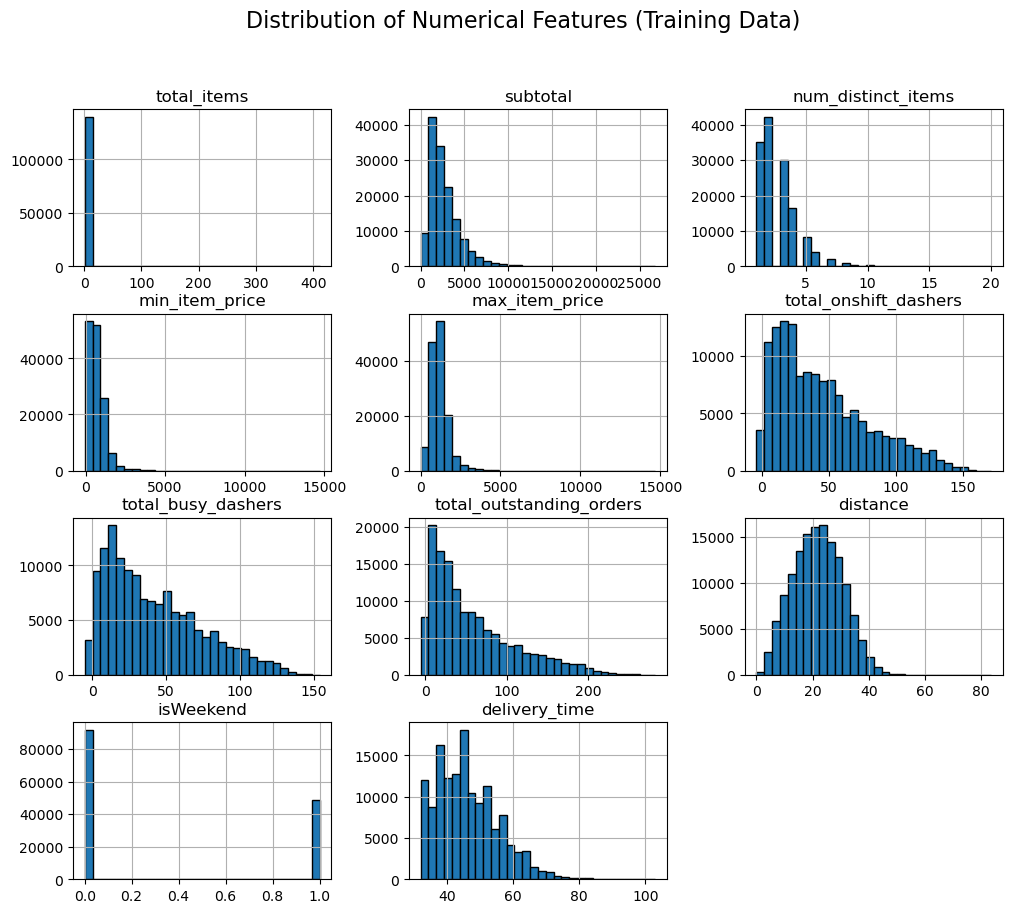

In [50]:
# Plot distributions for all numerical columns

# Identify numerical columns in training data
num_cols1 = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:", num_cols1)

# Plot histograms for numerical features
train_df[num_cols1].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features (Training Data)", fontsize=16)
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [52]:
print(train_df.columns.tolist())

['store_primary_category', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend', 'market_id_2.0', 'market_id_3.0', 'market_id_4.0', 'market_id_5.0', 'market_id_6.0', 'order_protocol_2.0', 'order_protocol_3.0', 'order_protocol_4.0', 'order_protocol_5.0', 'order_protocol_6.0', 'order_protocol_7.0', 'order_day_of_week_Monday', 'order_day_of_week_Saturday', 'order_day_of_week_Sunday', 'order_day_of_week_Thursday', 'order_day_of_week_Tuesday', 'order_day_of_week_Wednesday', 'delivery_time']


In [53]:
import warnings
warnings.filterwarnings("ignore")

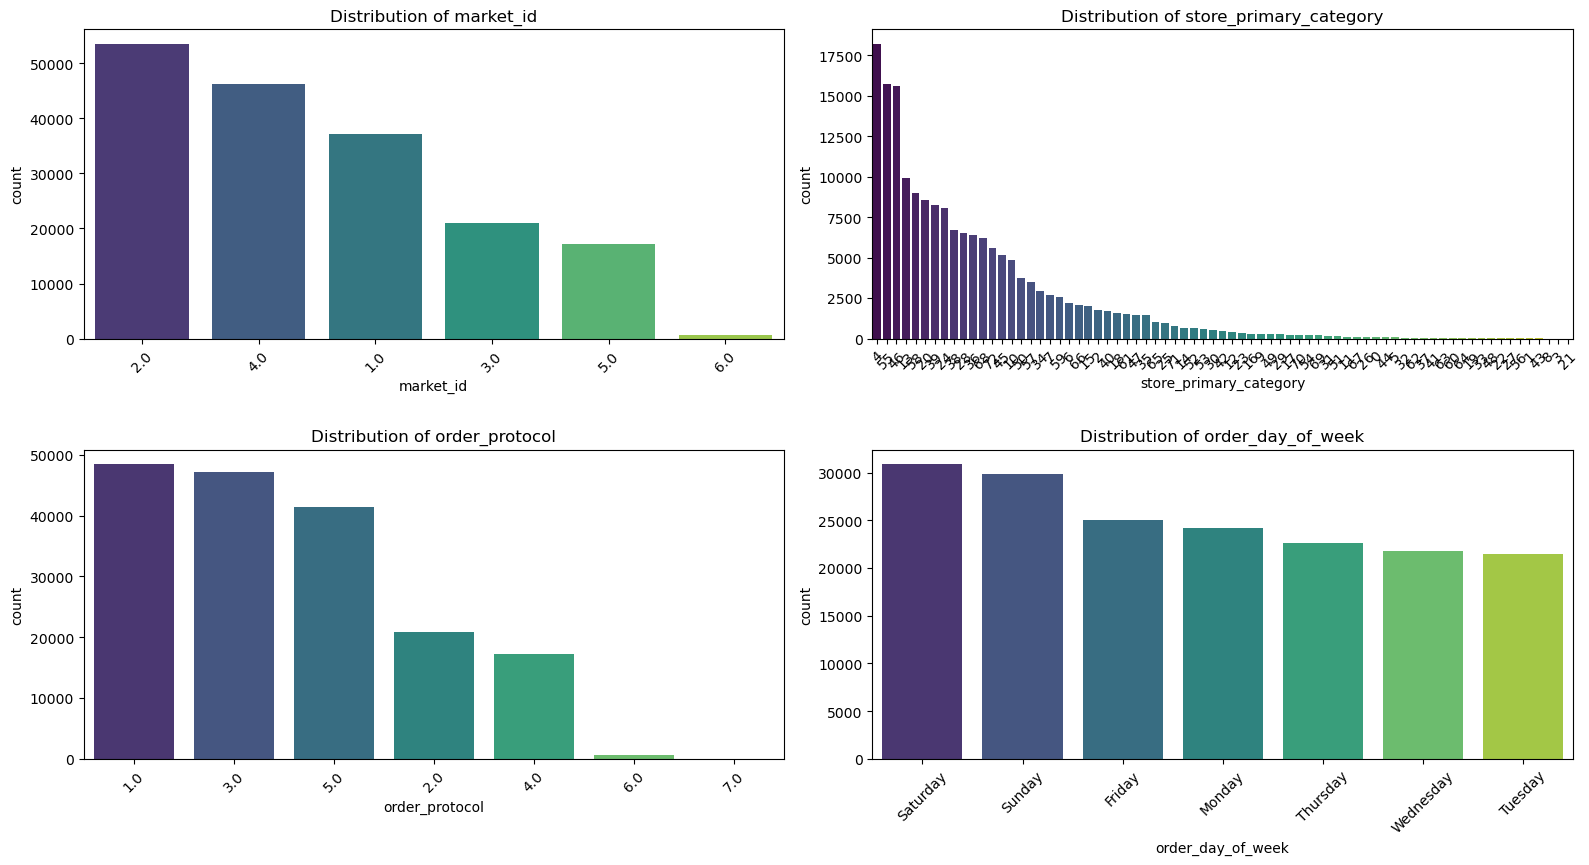

In [54]:
# Distribution of categorical columns

cat_cols = ['market_id', 'store_primary_category', 'order_protocol', 'order_day_of_week']

plt.figure(figsize=(16, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

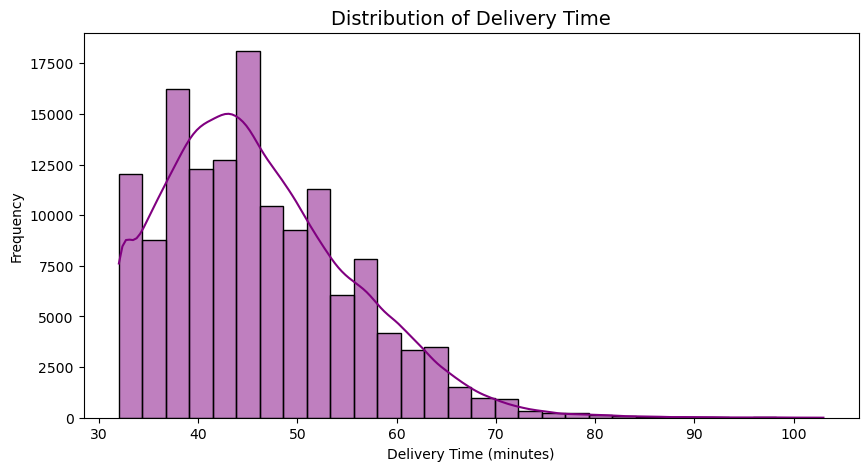

In [56]:
# Distribution of time_taken

plt.figure(figsize=(10,5))

# Histogram with KDE (smoothed curve)
sns.histplot(train_df['delivery_time'], kde=True, bins=30, color="purple")

plt.title("Distribution of Delivery Time", fontsize=14)
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

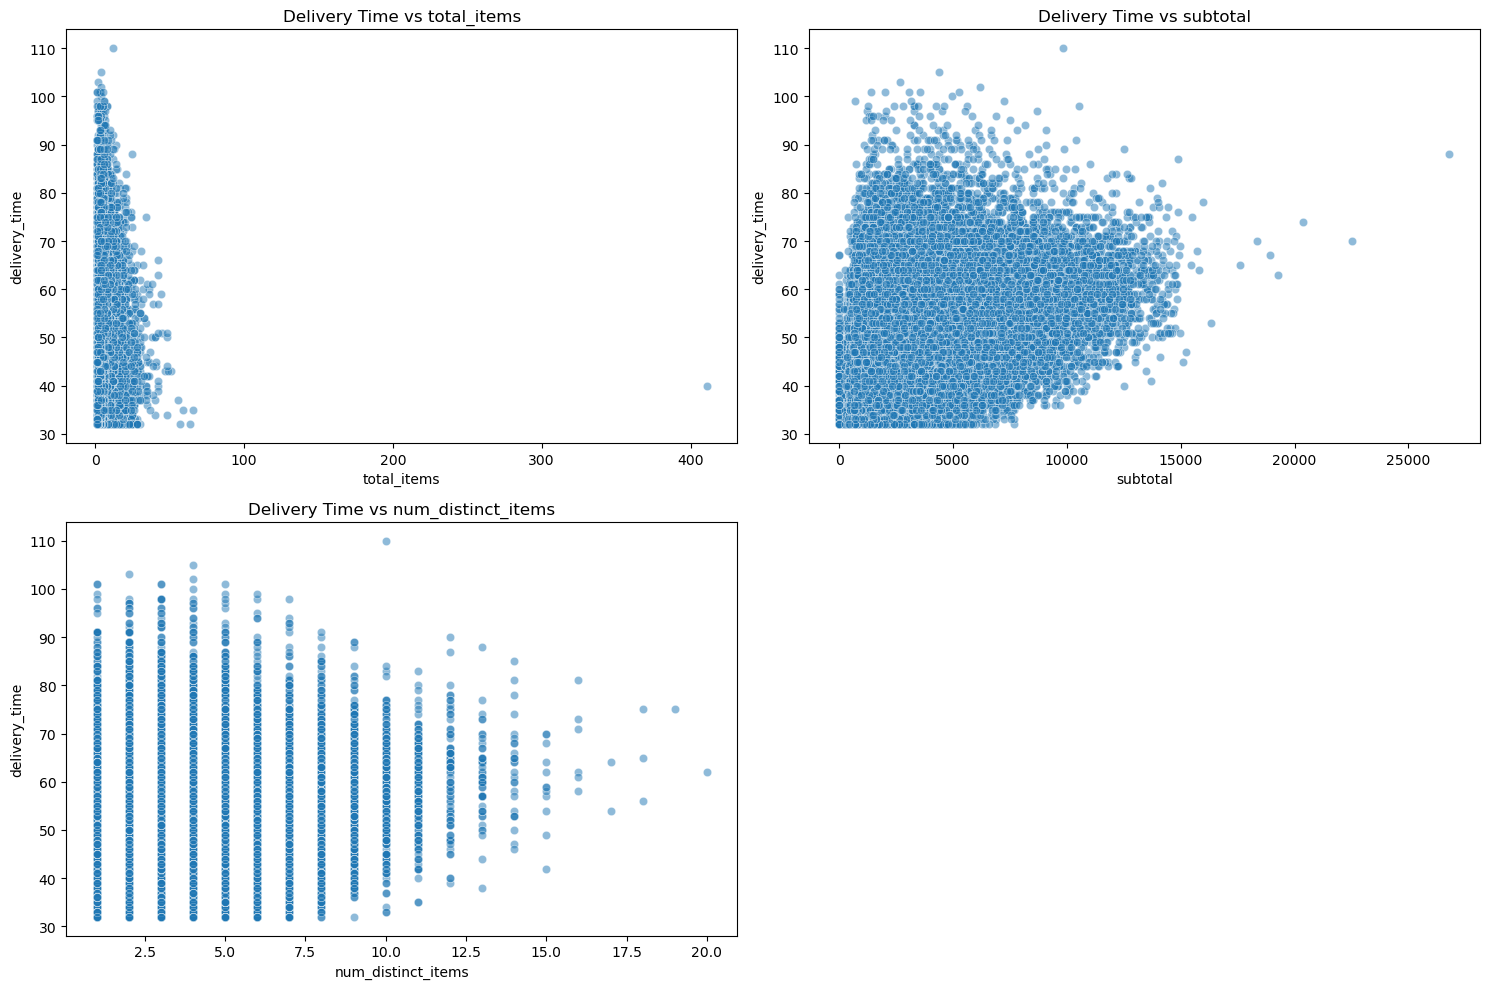

In [59]:
# Scatter plot to visualise the relationship between time_taken and other features

# Numerical Features
num_features = ['total_items', 'subtotal', 'num_distinct_items']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[col], y=df['delivery_time'], alpha=0.5)
    plt.title(f"Delivery Time vs {col}")
plt.tight_layout()
plt.show()


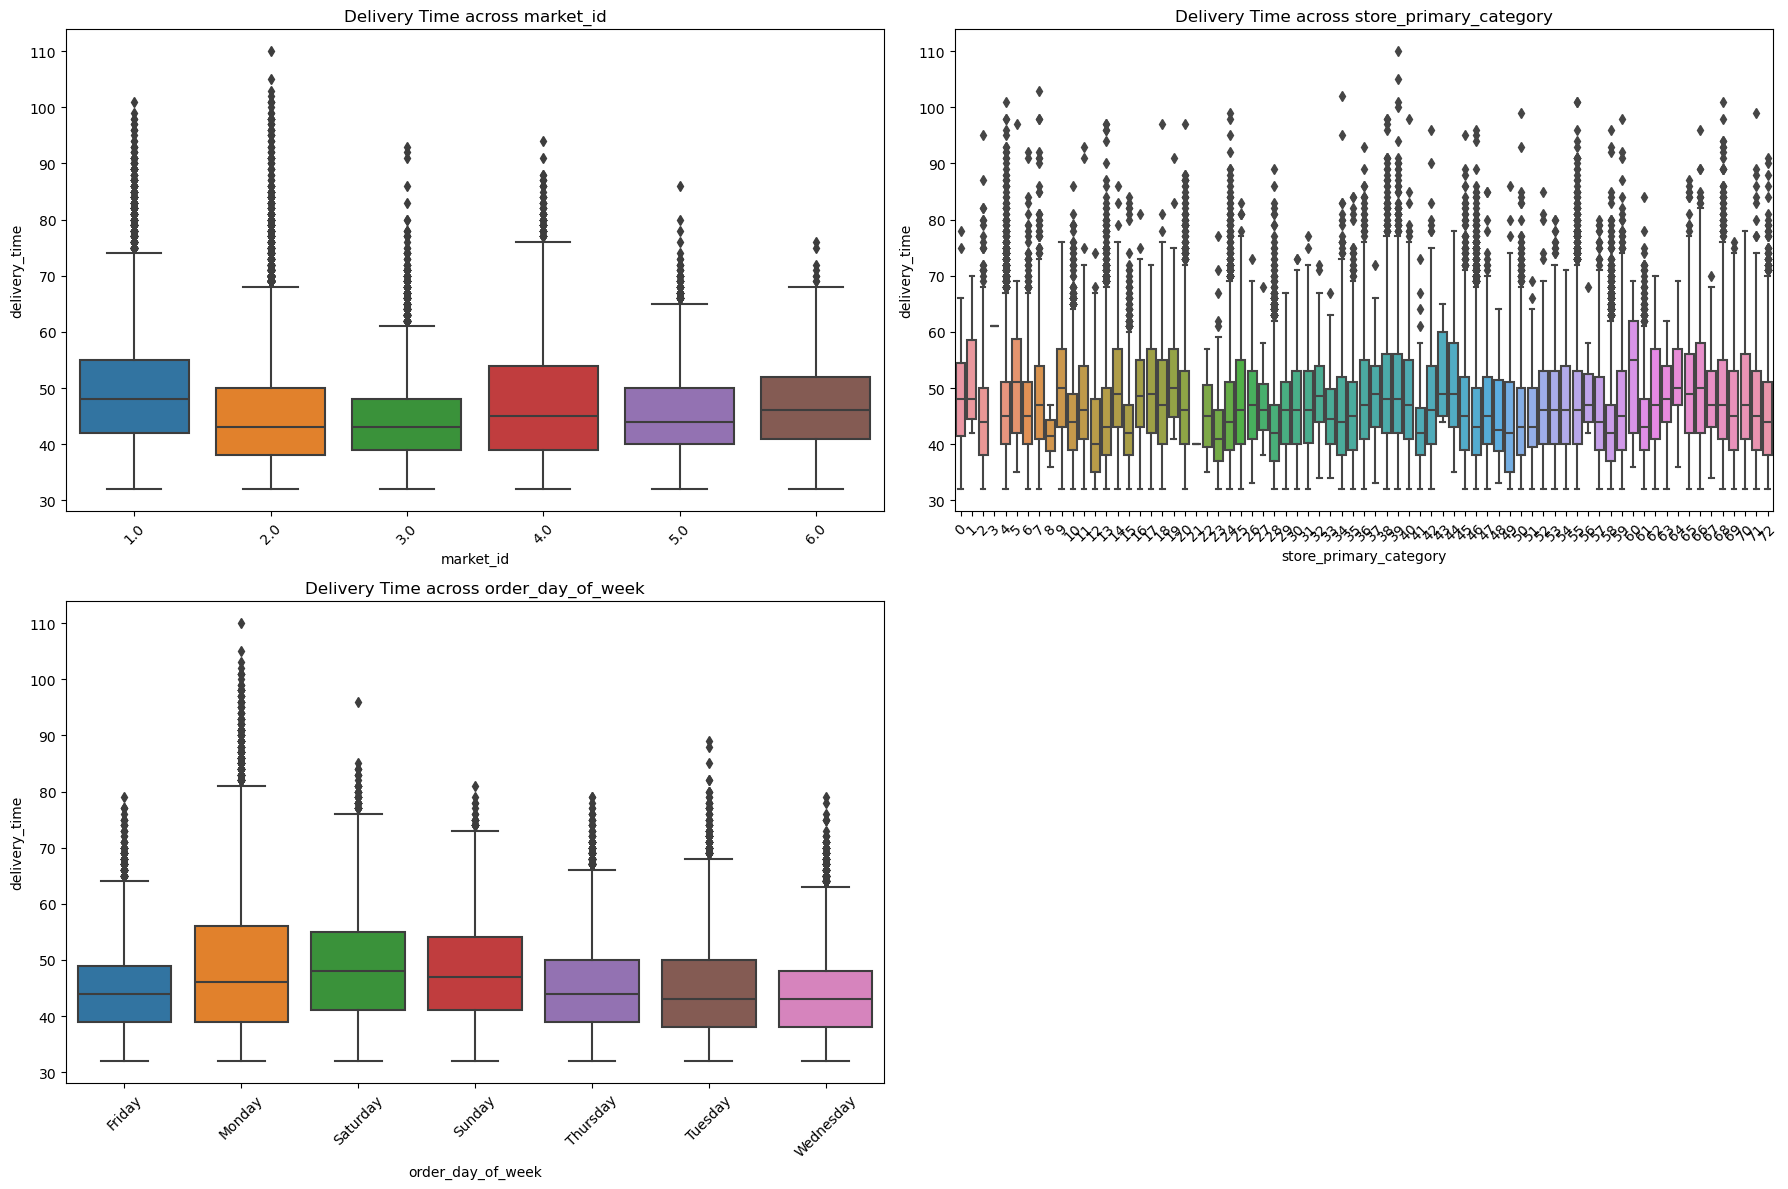

In [60]:
# Categorical Features
cat_features = ['market_id', 'store_primary_category', 'order_day_of_week']

plt.figure(figsize=(18, 12))
for i, col in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], y=df['delivery_time'])
    plt.title(f"Delivery Time across {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

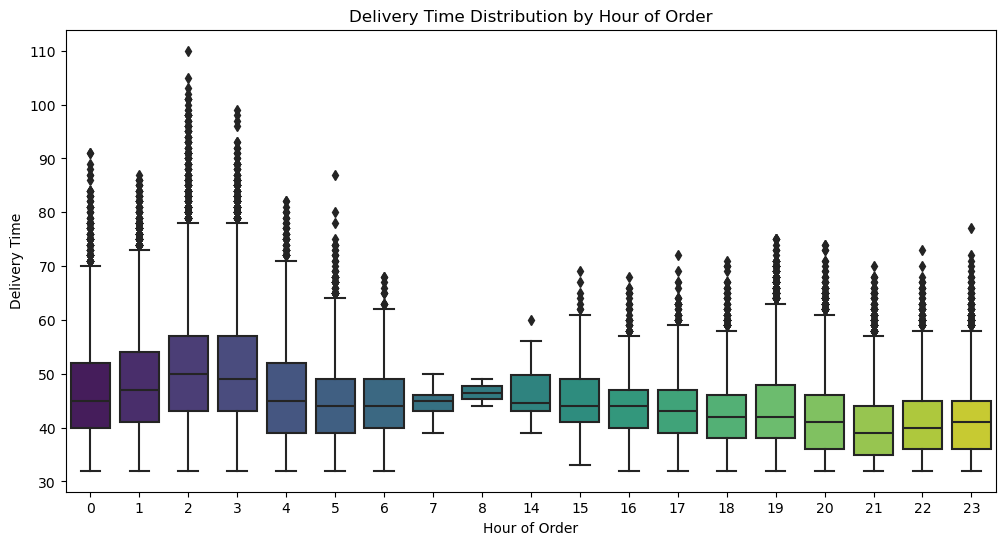

In [61]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['order_hour'], y=df['delivery_time'], palette="viridis")
plt.title("Delivery Time Distribution by Hour of Order")
plt.xlabel("Hour of Order")
plt.ylabel("Delivery Time")
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

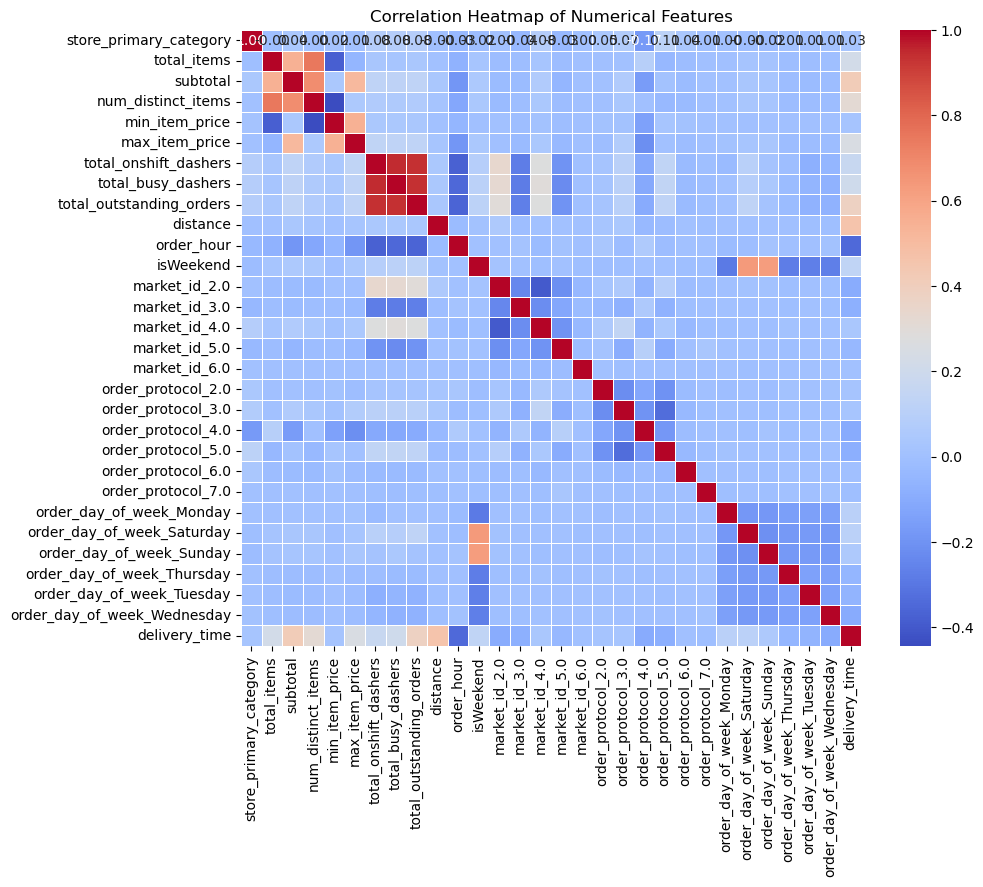

In [64]:
# Plot the heatmap of the correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [66]:
# Drop 3-5 weakly correlated columns from training dataset

corr = train_df.corr()['delivery_time'].sort_values()
print(corr)


order_hour                    -0.344290
order_protocol_4.0            -0.104740
order_day_of_week_Wednesday   -0.103305
market_id_2.0                 -0.096032
order_protocol_5.0            -0.085628
market_id_3.0                 -0.080915
order_day_of_week_Tuesday     -0.065337
order_day_of_week_Thursday    -0.054070
market_id_5.0                 -0.042919
order_protocol_7.0            -0.004434
order_protocol_6.0            -0.000581
market_id_6.0                  0.006167
order_protocol_2.0             0.019118
min_item_price                 0.023411
store_primary_category         0.027266
order_protocol_3.0             0.028083
market_id_4.0                  0.036546
order_day_of_week_Sunday       0.057515
order_day_of_week_Monday       0.106556
order_day_of_week_Saturday     0.111339
isWeekend                      0.134511
total_onshift_dashers          0.168299
total_busy_dashers             0.203979
total_items                    0.220891
max_item_price                 0.254416


In [67]:
weak_features = ['order_protocol_6.0','order_protocol_7.0','market_id_6.0','order_protocol_2.0','min_item_price']

X_train = X_train.drop(columns=weak_features)
X_test = X_test.drop(columns=weak_features)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

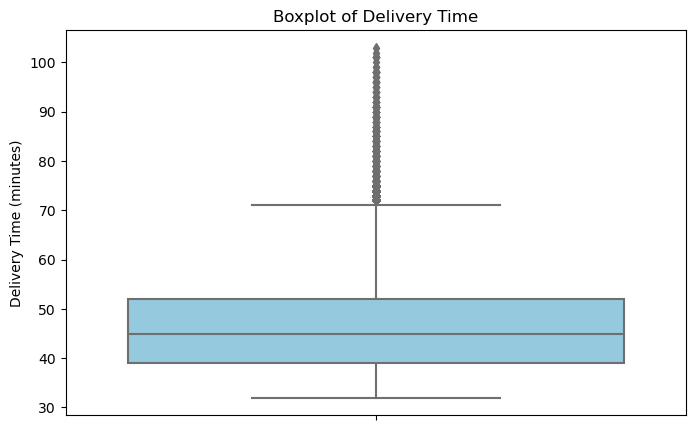

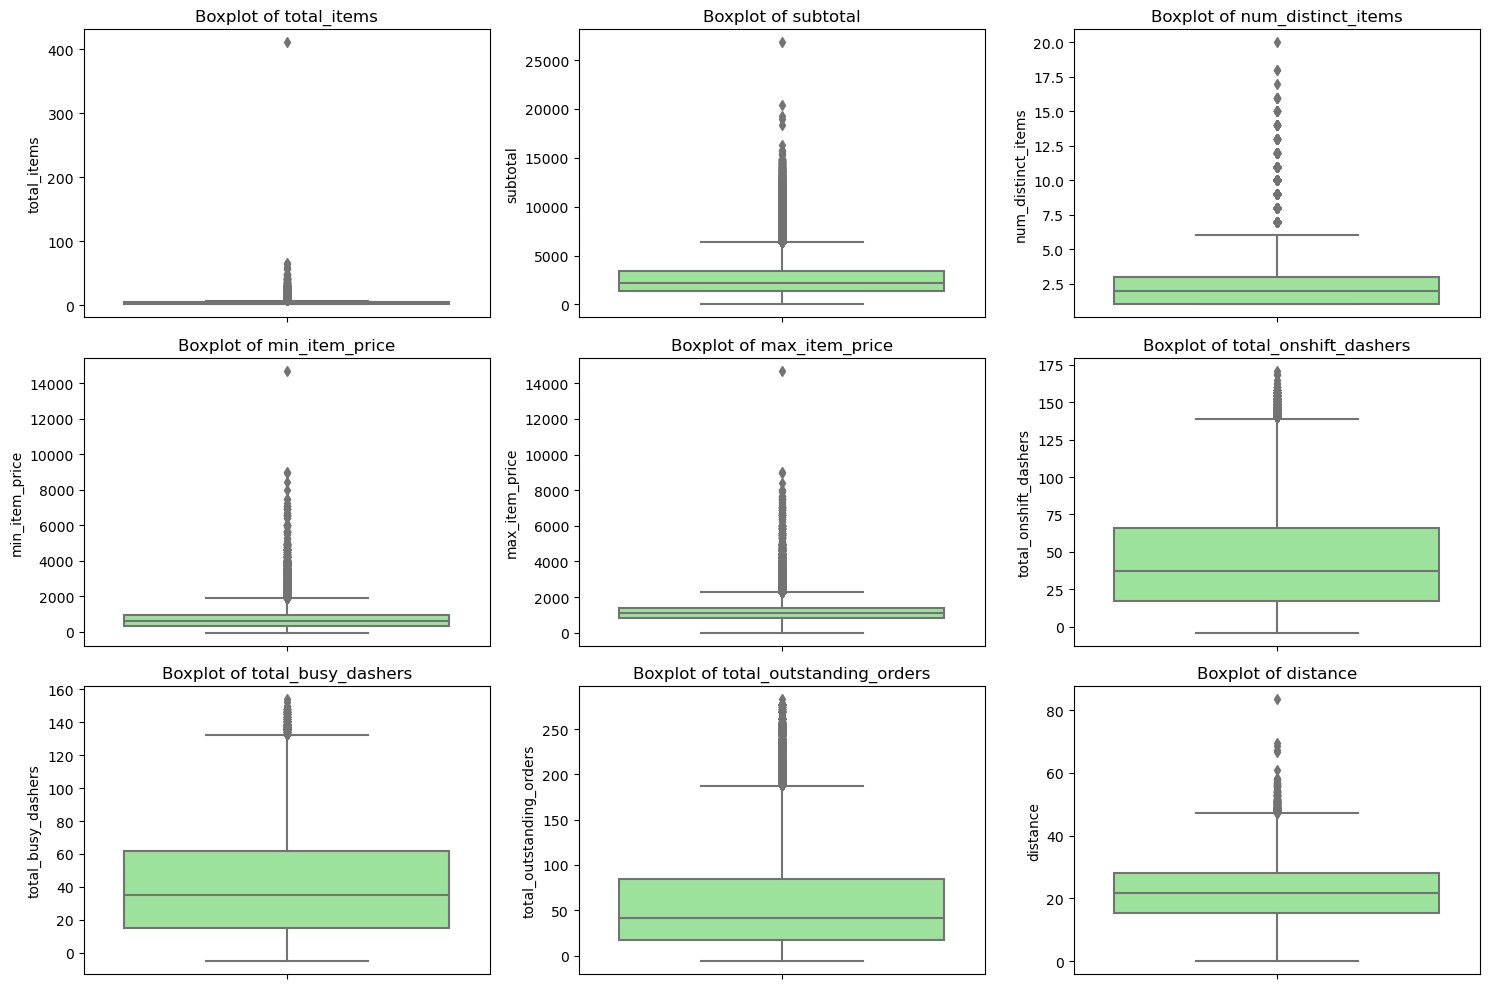

In [70]:
# Boxplot for time_taken

# Target variable boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=train_df['delivery_time'], color="skyblue")
plt.title("Boxplot of Delivery Time")
plt.ylabel("Delivery Time (minutes)")
plt.show()

# Boxplots for all numerical features
num_features = ['total_items', 'subtotal', 'num_distinct_items', 
                'min_item_price', 'max_item_price', 'total_onshift_dashers', 
                'total_busy_dashers', 'total_outstanding_orders', 'distance']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=train_df[col], color="lightgreen")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [72]:
# Handle outliers

# Function to cap outliers at 1st and 99th percentile
def cap_outliers(df, cols):
    for col in cols:
        q1 = df[col].quantile(0.01)
        q99 = df[col].quantile(0.99)
        df[col] = np.where(df[col] < q1, q1, df[col])
        df[col] = np.where(df[col] > q99, q99, df[col])
    return df

# Only keep numerical features still present in X_train
num_features = ['total_items', 'subtotal', 'num_distinct_items', 
                'max_item_price', 'total_onshift_dashers', 
                'total_busy_dashers', 'total_outstanding_orders', 'distance']

# Apply capping on train and test
X_train[num_features] = cap_outliers(X_train[num_features].copy(), num_features)
X_test[num_features] = cap_outliers(X_test[num_features].copy(), num_features)

# For target variable (delivery_time) → cap separately in y_train if needed
y_train = cap_outliers(y_train.to_frame(), ['delivery_time'])['delivery_time']


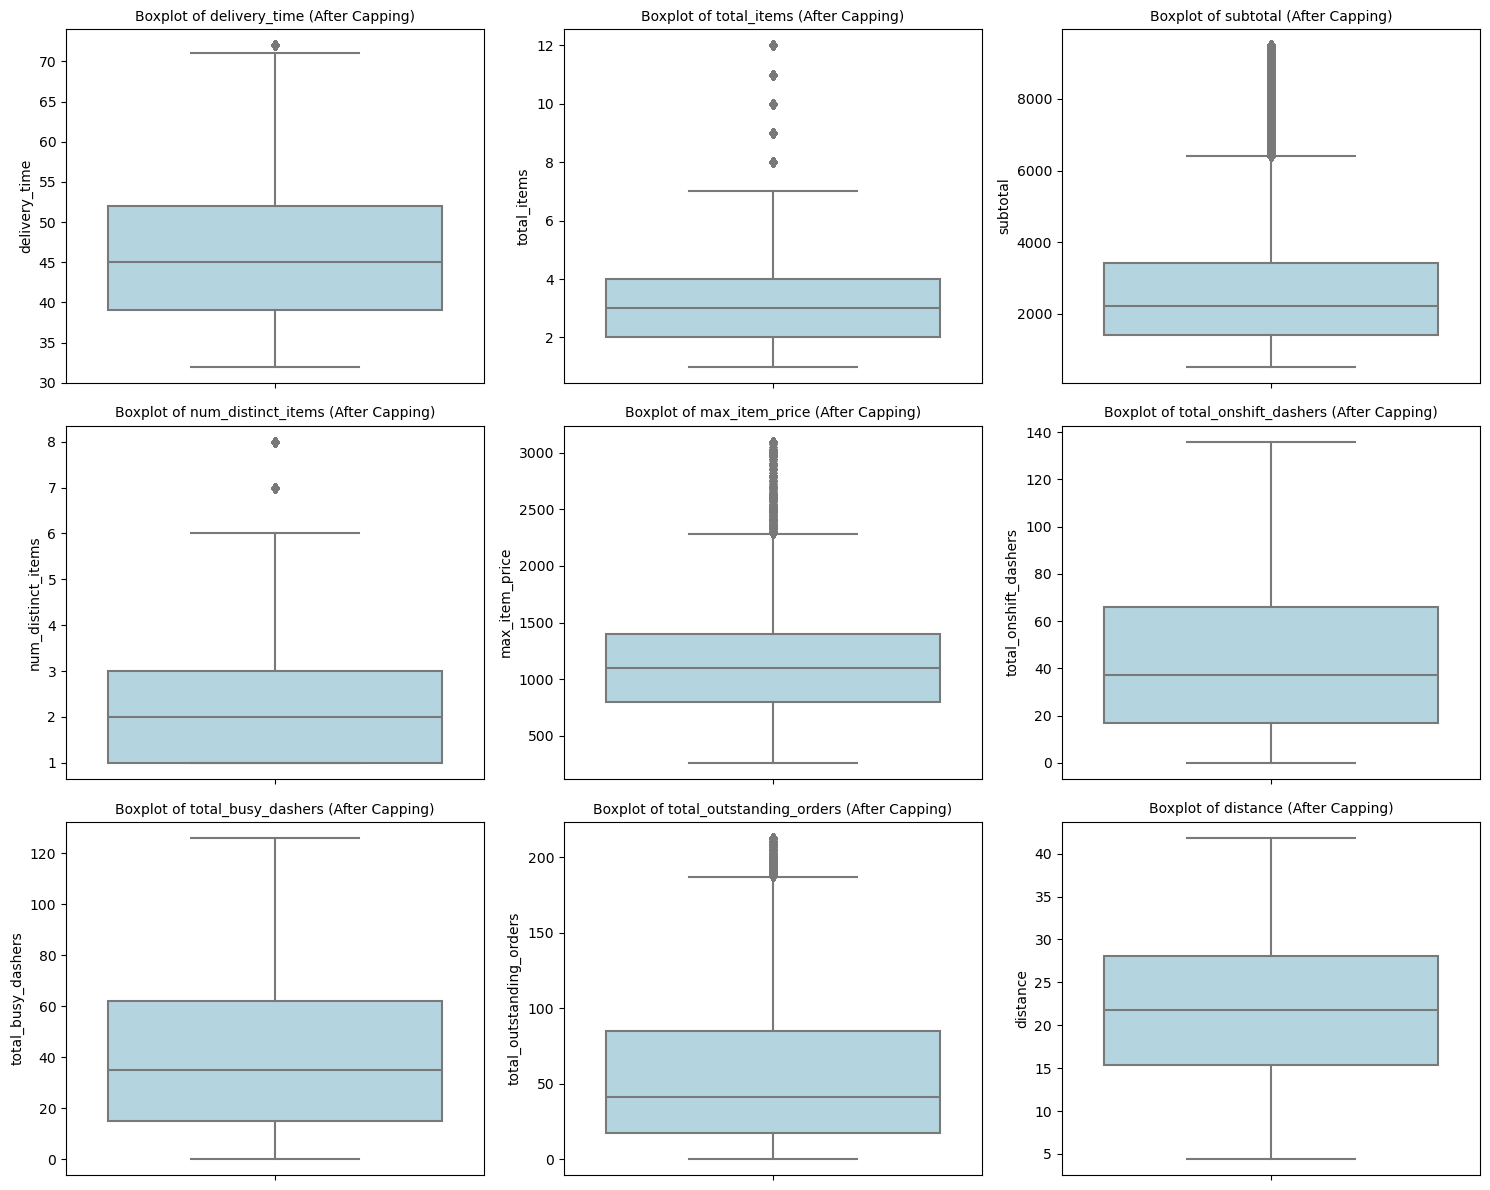

In [73]:
# Boxplot to recheck the outliers treatment

# Numerical features you capped + target
features_after = ['delivery_time', 'total_items', 'subtotal', 
                  'num_distinct_items', 'max_item_price', 
                  'total_onshift_dashers', 'total_busy_dashers', 
                  'total_outstanding_orders', 'distance']

# Combine X_train and y_train for plotting convenience
df_after = X_train.copy()
df_after['delivery_time'] = y_train

# Plot boxplots for all features after capping
plt.figure(figsize=(15, 12))
for i, col in enumerate(features_after, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_after[col], color="lightblue")
    plt.title(f'Boxplot of {col} (After Capping)', fontsize=10)

plt.tight_layout()
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [75]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [78]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [80]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [82]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [84]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [86]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [89]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [91]:
# Apply scaling to the numerical columns

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optional: convert back to DataFrame for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

X_train_scaled.shape

(140621, 24)

In [92]:
X_train_scaled.head()

,store_primary_category,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,order_hour,...,market_id_5.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_day_of_week_Monday,order_day_of_week_Saturday,order_day_of_week_Sunday,order_day_of_week_Thursday,order_day_of_week_Tuesday,order_day_of_week_Wednesday
42111,-1.394148,-0.998753,-0.761850,-1.067386,0.383469,-0.636998,-0.681666,-0.750830,-1.412928,1.328434,...,-0.32873,-0.605359,-0.328783,-0.555662,2.510520,-0.461613,-0.452289,-0.384369,-0.373137,-0.376074
58452,0.486361,0.860002,0.918114,1.509374,-0.490063,1.955707,1.820728,2.866945,1.474468,-0.746049,...,-0.32873,-0.605359,-0.328783,1.799657,-0.398324,2.166317,-0.452289,-0.384369,-0.373137,-0.376074
20644,0.438143,1.324690,2.975854,0.220994,0.577587,1.023498,1.163850,1.096544,1.516113,-0.630800,...,-0.32873,-0.605359,-0.328783,-0.555662,-0.398324,-0.461613,-0.452289,-0.384369,-0.373137,-0.376074
79735,0.438143,-0.069376,0.560370,0.220994,0.577587,2.392679,2.008408,2.212666,0.456476,-0.746049,...,-0.32873,-0.605359,-0.328783,-0.555662,-0.398324,2.166317,-0.452289,-0.384369,-0.373137,-0.376074
167933,-1.538802,0.860002,3.373665,1.509374,2.858475,-0.025236,0.069052,0.057396,-0.473599,-0.746049,...,-0.32873,-0.605359,-0.328783,1.799657,-0.398324,-0.461613,-0.452289,2.601670,-0.373137,-0.376074


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **Feature Selection**

In [95]:
from sklearn.feature_selection import RFE

In [96]:
estimator = LinearRegression()
selector = RFE(estimator,n_features_to_select=10)

selector = selector.fit(X_train_scaled, y_train)
selector.support_

array([False, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False])

In [97]:
selected_features = X_train_scaled.columns[selector.support_]
print(selected_features)

Index(['subtotal', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'order_hour', 'market_id_2.0',
       'market_id_3.0', 'market_id_4.0', 'market_id_5.0'],
      dtype='object')


In [98]:
X_train = X_train_scaled[selected_features]
X_test = X_test_scaled[selected_features]

print(X_train.shape)
print(X_test.shape)

(140621, 10)
(35156, 10)


#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [101]:
import statsmodels.api as sm

In [102]:
# Create/Initialise the model
# Train the model using the training data

mlr = LinearRegression()
mlr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = mlr.predict(X_test_scaled)

In [103]:
X_train_sm = sm.add_constant(X_train) #X_train_sm["const"]=1
X_test_sm = sm.add_constant(X_test)


In [104]:
model1 = sm.OLS(np.array(y_train),X_train_sm) # Ordinary Least Squares
res1 = model1.fit()
res1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 1.115e+05
Date:                Tue, 19 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:45:07   Log-Likelihood:            -3.5666e+05
No. Observations:              140621   AIC:                         7.133e+05
Df Residuals:                  140610   BIC:                         7.135e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       46.1328      0.008   5659.018      0.000      46.117      46.149
subtotal                     2.9981      0.008    358.526      0.000       2.982       3.015
total_onshift_dashers      -12.0084      0.029   -413.054      0.000     -12.065     -11.951
total_busy_dashers          -4.2564      0.028   -151.439      0.000      -4.311      -4.201
total_outstanding_orders    18.0672      0.026    687.891      0.000      18.016      18.119
distance                     4.2207      0.008    515.881      0.000       4.205       4.237
order_hour                  -1.9087      0.009   -207.361      0.000      -1.927      -1.891
market_id_2.0               -2.1929      0.012   -181.995      0.000      -2.217      -2.169
market_id_3.0               -1.2643      0.010   -131.770      0.000      -1.283      -1.246
market_id_4.0               -1.7450      0.012   -149.766      0.000      -1.768      -1.722
market_id_5.0               -0.9191      0.009    -97.819      0.000      -0.938      -0.901
==============================================================================
Omnibus:                    21786.820   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58753.525
Skew:                           0.850   Prob(JB):                         0.00
Kurtosis:                       5.671   Cond. No.                         8.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# Calculate the VIF 
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_sm.columns

vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,subtotal,1.052247
2,total_onshift_dashers,12.717994
3,total_busy_dashers,11.886782
4,total_outstanding_orders,10.380169
5,distance,1.007249
6,order_hour,1.274850
7,market_id_2.0,2.184680
8,market_id_3.0,1.385271
9,market_id_4.0,2.042758


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [109]:
# Loop through the number of features and test the model

X_train_sm = X_train_sm.drop("total_onshift_dashers",axis=1)
X_test_sm = X_test_sm.drop("total_onshift_dashers",axis=1)

#### ** Model 2 **

In [111]:
model2 = sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                 4.739e+04
Date:                Tue, 19 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:45:08   Log-Likelihood:            -4.1252e+05
No. Observations:              140621   AIC:                         8.251e+05
Df Residuals:                  140611   BIC:                         8.252e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       46.1328      0.012   3803.773      0.000      46.109      46.157
subtotal                     2.9542      0.012    237.478      0.000       2.930       2.979
total_busy_dashers         -10.3791      0.036   -292.152      0.000     -10.449     -10.309
total_outstanding_orders    13.0245      0.035    376.462      0.000      12.957      13.092
distance                     4.2097      0.012    345.855      0.000       4.186       4.234
order_hour                  -1.3961      0.014   -102.888      0.000      -1.423      -1.369
market_id_2.0               -3.0454      0.018   -172.431      0.000      -3.080      -3.011
market_id_3.0               -1.3850      0.014    -97.071      0.000      -1.413      -1.357
market_id_4.0               -2.2630      0.017   -131.314      0.000      -2.297      -2.229
market_id_5.0               -1.2020      0.014    -86.216      0.000      -1.229      -1.175
==============================================================================
Omnibus:                     3303.082   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7408.056
Skew:                           0.083   Prob(JB):                         0.00
Kurtosis:                       4.112   Cond. No.                         6.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_sm.columns

vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,subtotal,1.052077
2,total_busy_dashers,8.580483
3,total_outstanding_orders,8.137421
4,distance,1.007239
5,order_hour,1.251678
6,market_id_2.0,2.120592
7,market_id_3.0,1.383987
8,market_id_4.0,2.019092
9,market_id_5.0,1.321423


In [113]:
# Build the final model with selected number of features

#### ** Model 3 **

In [115]:
X_train_sm = X_train_sm.drop("total_busy_dashers",axis=1)
X_test_sm = X_test_sm.drop("total_busy_dashers",axis=1)

model3 = sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                 2.654e+04
Date:                Tue, 19 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:45:09   Log-Likelihood:            -4.4588e+05
No. Observations:              140621   AIC:                         8.918e+05
Df Residuals:                  140612   BIC:                         8.919e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       46.1328      0.015   3000.587      0.000      46.103      46.163
subtotal                     2.9372      0.016    186.254      0.000       2.906       2.968
total_outstanding_orders     4.0279      0.020    201.490      0.000       3.989       4.067
distance                     4.1786      0.015    270.819      0.000       4.148       4.209
order_hour                  -1.0550      0.017    -61.565      0.000      -1.089      -1.021
market_id_2.0               -4.0558      0.022   -184.728      0.000      -4.099      -4.013
market_id_3.0               -1.3156      0.018    -72.749      0.000      -1.351      -1.280
market_id_4.0               -3.1136      0.022   -144.601      0.000      -3.156      -3.071
market_id_5.0               -1.0648      0.018    -60.281      0.000      -1.099      -1.030
==============================================================================
Omnibus:                     1712.811   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2199.214
Skew:                           0.187   Prob(JB):                         0.00
Kurtosis:                       3.485   Cond. No.                         2.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_sm.columns

vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,subtotal,1.052054
2,total_outstanding_orders,1.690573
3,distance,1.007162
4,order_hour,1.242414
5,market_id_2.0,2.039272
6,market_id_3.0,1.383604
7,market_id_4.0,1.961459
8,market_id_5.0,1.319923


### **Model Evaluation**

In [234]:
y_train_pred = res3.predict(X_train_sm)
y_test_pred = res3.predict(X_test_sm)

In [236]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train:",round(r2_train,2),"Test:",round(r2_test,2))

Train: 0.6 Test: 0.59


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

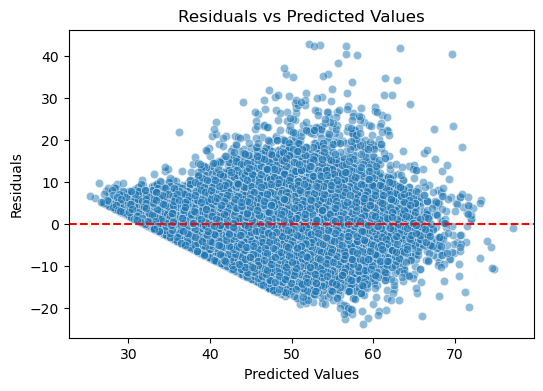

In [238]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

# Residuals
residuals = y_test - y_test_pred

# 1. Residuals vs Predicted Values
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

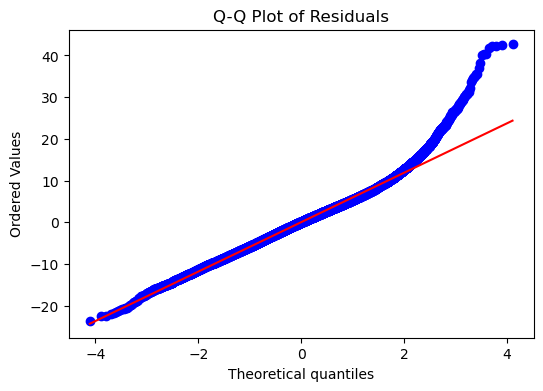

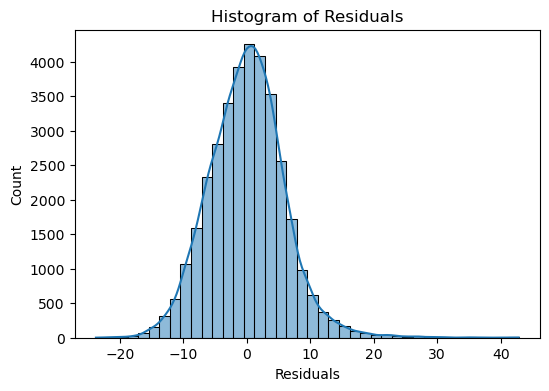

In [242]:
import scipy.stats as stats

# 2. Q-Q Plot
plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=40, kde=True)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.show()

[Your inferences here:]



### **Model Evaluation**

#### Delivery Time = (2.9372*subtotal) + (4.0279*total_outstanding_orders) + (4.1786*distance) - (1.0550*order_hour) - (4.0558*market_id_2.0)
####                - (1.3156*market_id_3.0) - (3.1136*market_id_4.0) - (1.0648*market_id_5.0) + 46.1328

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


# Compare the scaled vs unscaled features used in the final model

#### Answer
From the unscaled model, distance (4.09) has the strongest positive effect, meaning every additional km increases delivery time by ~4 minutes. Outstanding orders (2.97) and subtotal (2.95) also increase delivery time, while order hour (-1.40) and being in Market 2 (-1.95) reduce it slightly.

With scaled features, coefficients represent the effect of a 1 standard deviation change, making them directly comparable. The scaled results confirm that distance is the most important factor, followed by outstanding orders and subtotal, while order timing and market differences have smaller effects.

### Analyze the effect of a unit change in a feature, say 'total_items'

#### Answer

A unit increase in total_items leads to a small but positive increase in delivery time, since more items typically require longer preparation and packaging. In the scaled model, its coefficient shows the relative importance compared to other features, but in the unscaled model, the effect is directly in minutes per additional item.

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, categorical variables such as market_id, order_day_of_week, and order_protocol are present. Their coefficients indicate differences in average delivery time across markets, order days, and protocols, showing they have a meaningful impact on delivery time.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>test_size = 0.2 means 20% of the data is kept aside for testing, while the remaining 80% is used for training the model.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>From the heatmap, delivery_time has the highest correlation with the target variable (since it is the target itself). Among features, distance shows the highest positive correlation with delivery_time.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>I detected outliers using boxplots and by checking extreme values beyond the 1st and 99th percentiles.
To address them, I applied capping (winsorization), replacing extreme values with the 1st and 99th percentile values to reduce their influence without dropping data.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>The top 3 features significantly affecting delivery time are:

1. Distance – longer distance increases delivery time.

2. Subtotal – higher order value slightly increases delivery time.

3. Total outstanding orders – more pending orders increase delivery time.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear Regression is a supervised learning algorithm used for predicting a continuous dependent variable (Y) based on one or more independent variables (X). It assumes a linear relationship between the input features and the target.
For Multiple Linear Regression, the model can be written as: 𝑌=𝛽0+𝛽1𝑋1+𝛽2𝑋2+...+𝛽𝑛𝑋𝑛
>Where:

Y = Target (delivery_time in your case)
Xi = Independent variables (features like distance, subtotal, etc.)
β0 = Intercept (constant term)
βi = Coefficients (effect of each feature)


 




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Simple Linear Regression uses one independent variable to predict the dependent variable (e.g., delivery_time = β₀ + β₁·distance).

Multiple Linear Regression uses two or more independent variables to predict the dependent variable (e.g., delivery_time = β₀ + β₁·distance + β₂·subtotal + β₃·orders …).

👉 Multiple regression captures more complex relationships, while simple regression shows the effect of just one feature.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function (Mean Squared Error) measures the difference between predicted and actual values. It is minimized using optimization methods like Gradient Descent or Ordinary Least Squares, which adjust coefficients to get the best fit line.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting happens when the model learns both the patterns and noise in the training data, performing well on training but poorly on test data.

>Underfitting happens when the model is too simple and fails to capture the patterns in the data, performing poorly on both training and test sets.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
Residual plots are a key diagnostic tool in linear regression. They plot the errors (residuals) against the predicted values to check model assumptions. If the residuals are randomly scattered around zero, it suggests the model fits well. Clear patterns or trends in the plot may indicate non-linearity in the data. If the spread of residuals increases or decreases with predictions, it shows heteroscedasticity (non-constant variance). Clusters or unusual points in the plot may reveal outliers or influential observations. Overall, residual plots help in validating model accuracy and guiding improvements.